<a href="https://colab.research.google.com/github/Kimbaeda/youngwoo/blob/main/6%EC%9D%BC%EC%B0%A8_%EA%B8%80%EC%9E%90%EB%8B%A8%EC%9C%84(RNN)%EC%9C%BC%EB%A1%9C_%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%83%9D%EC%84%B1%ED%95%98%EA%B8%B0%2C%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%87%BC%ED%95%91_%EB%A6%AC%EB%B7%B0_%EA%B0%90%EC%84%B1_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 경마장에 말이 달리고 있다.
# 경마장에
# 말이
# 달리고
# 있다

# 글자단위
# 경
# 마
# 장
# 에
# 말
# 이
# 달
# 리
# 고
# 있
# 다

# 글자 단위 RNN 언어 모델

In [ ]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

In [ ]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

('11-0.txt', <http.client.HTTPMessage at 0x7f4222685990>)

In [ ]:
f = open('11-0.txt', 'rb')
lines = []
for line in f:
  line = line.strip() # strip을 통해 \r, \n을 제거
  line = line.lower() # 소문자화 
  line = line.decode('ascii', 'ignore') # \we2\x80\x99등과 같은 바이트 열 제거
  if len(line)>0:
    lines.append(line)
f.close()

In [ ]:
lines[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [ ]:
text = ' '.join(lines)
print('문자열의 길이 또는 총 글자의 갯수 : %d' %len(text))

문자열의 길이 또는 총 글자의 갯수 : 159484


In [ ]:
print(text[:10])

the projec


In [ ]:
# 글자 집합을 만들어보자

char_vocab = sorted(list(set(text)))
vocab_size=len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))

글자 집합의 크기 : 56


In [ ]:
# 글자 집합에 인덱스를 부여하고 전부 출력하기

char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


In [ ]:
# 인덱스로부터 글자를 리턴하는 index_to_char 생성

index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [ ]:
# apple
# sample의 길이 4
# Example) 샘플의 길이가 4라면 4개의 입력 글자 시퀀스로 부터 4개의 출력 글자 시퀀스를 예측. 즉, RNN의 time step은 4번
# appl -> pple
# appl은 train_X(입력 시퀀스), pple는 train_y(예측해야하는 시퀀스)에 저장한다.

In [ ]:
# 훈련 데이터 구성

In [ ]:
# 전체 text 문자열로부터 다수의 문장 샘플들로 분리
# 샘플의 길이를 정하고 해당 길이만큼 문자열 전체를 전부 등분

seq_length = 60 # 문장의 길이를 60으로 한다.
n_samples = int(np.floor((len(text) - 1) / seq_length)) # 문자열을 60등분한다. 그러면 즉, 총 샘플의 개수
print ('문장 샘플의 수 : {}'.format(n_samples))

문장 샘플의 수 : 2658


In [ ]:
train_X = []
train_y = []

for i in range(n_samples): # 2,646번 수행
    X_sample = text[i * seq_length: (i + 1) * seq_length]
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 가져온다.
    X_encoded = [char_to_index[c] for c in X_sample] # 하나의 문장 샘플에 대해서 정수 인코딩
    train_X.append(X_encoded)

    y_sample = text[i * seq_length + 1: (i + 1) * seq_length + 1] # 오른쪽으로 1칸 쉬프트한다.
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [ ]:
# train_X와 train_y의 첫번째 쌤플과 두번째 쌤플을 출력하여 데이터의 구성을 확인

print(train_X[0])

[49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]


In [ ]:
print(train_y[0])

[37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]


In [ ]:
print(train_X[1])

[43, 33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54]


In [ ]:
print(train_y[1])

[33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54, 52]


In [ ]:
# x와 y에 대한 원-핫 인코딩 수행. 
# 글자 단위 RNN에서는 입력시퀀스에 대해 워드 입베딩 하지 않습니다.
# 임베딩층(embedding layer)을 사용하지 않을 것이므로, 입력 시퀀스인 train_X에 대해서도 원-핫 인코딩

train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2658, 60, 56)
train_y의 크기(shape) : (2658, 60, 56)


샘플의 수가 2658, 입력 시퀀스의 길이(input_length) 60, 각 벡터의 차원 (input_dim) 56 의미

원-핫 벡터의 차원은 글자 집합의 크기인 56

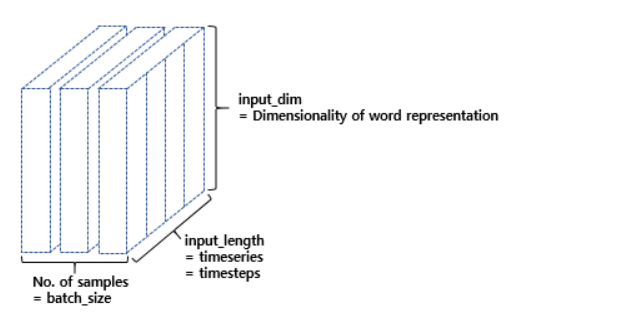

## 모델 설계하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

Epoch 1/80
84/84 - 10s - loss: 3.0745 - accuracy: 0.1821
Epoch 2/80
84/84 - 1s - loss: 2.7122 - accuracy: 0.2554
Epoch 3/80
84/84 - 1s - loss: 2.3776 - accuracy: 0.3320
Epoch 4/80
84/84 - 1s - loss: 2.2342 - accuracy: 0.3668
Epoch 5/80
84/84 - 1s - loss: 2.1258 - accuracy: 0.3927
Epoch 6/80
84/84 - 1s - loss: 2.0414 - accuracy: 0.4135
Epoch 7/80
84/84 - 1s - loss: 1.9708 - accuracy: 0.4305
Epoch 8/80
84/84 - 1s - loss: 1.9063 - accuracy: 0.4472
Epoch 9/80
84/84 - 1s - loss: 1.8531 - accuracy: 0.4627
Epoch 10/80
84/84 - 1s - loss: 1.7937 - accuracy: 0.4785
Epoch 11/80
84/84 - 1s - loss: 1.7465 - accuracy: 0.4910
Epoch 12/80
84/84 - 1s - loss: 1.7014 - accuracy: 0.5035
Epoch 13/80
84/84 - 1s - loss: 1.6581 - accuracy: 0.5152
Epoch 14/80
84/84 - 1s - loss: 1.6191 - accuracy: 0.5246
Epoch 15/80
84/84 - 1s - loss: 1.5812 - accuracy: 0.5352
Epoch 16/80
84/84 - 1s - loss: 1.5455 - accuracy: 0.5444
Epoch 17/80
84/84 - 1s - loss: 1.5115 - accuracy: 0.5539
Epoch 18/80
84/84 - 1s - loss: 1.4764 -

In [ ]:
def sentence_generation(model, length):
    ix = [np.random.randint(vocab_size)] # 글자에 대한 랜덤 인덱스 생성
    y_char = [index_to_char[ix[-1]]] # 랜덤 익덱스로부터 글자 생성
    print(ix[-1],'번 글자',y_char[-1],'로 예측을 시작!')
    X = np.zeros((1, length, vocab_size)) # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성

    for i in range(length):
        X[0][i][ix[-1]] = 1 # X[0][i][예측한 글자의 인덱스] = 1, 즉, 예측 글자를 다음 입력 시퀀스에 추가
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [ ]:
sentence_generation(model, 100)

5 번 글자 % 로 예측을 시작!
% what was lat it pool one? i should like to be a large right house of _that_ whate? the cook was li

'% what was lat it pool one? i should like to be a large right house of _that_ whate? the cook was lig'

# 글자 단위 RNN(Char RNN)으로 텍스트 생성하기 
- 다 대 일(many-to-one) 구조로 학습시키고, 텍스트 생성

In [ ]:
# 데이터에 대한 이해와 전처리

## 데이터에 대한 이해와 전처리

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
text='''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [ ]:
# 단락 구분을 업애고 하나의 문자열로 재저장

tokens = text.split() # '\n 제거'
text = ' '.join(tokens)
print(text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [ ]:
# 글자 집합 만들기

char_vocab = sorted(list(set(text))) # 중복을 제거한 글자 집합 생성
print(char_vocab)

vocab_size=len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))

[' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
글자 집합의 크기 : 33


In [ ]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [ ]:
# # Example) 5개의 입력 글자 시퀀스로부터 다음 글자 시퀀스를 예측. 즉, RNN의 time step은 5번
# stude -> n 
# tuden -> t

In [ ]:
length = 11
sequences = []
for i in range(length, len(text)):
    seq = text[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))

총 훈련 샘플의 수: 426


In [ ]:
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [ ]:
sequences[30:45]

['mmer, I lik',
 'mer, I like',
 'er, I like ',
 'r, I like t',
 ', I like to',
 ' I like to ',
 'I like to c',
 ' like to co',
 'like to con',
 'ike to cont',
 'ke to conte',
 'e to contem',
 ' to contemp',
 'to contempl',
 'o contempla']

In [ ]:
# char_to_index를 사용하여 전체 데이터에 대해서 정수 인코딩

X = []
for line in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    temp_X = [char_to_index[char] for char in line] # 문장 샘플에서 각 글자에 대해서 정수 인코딩을 수행.
    X.append(temp_X)

for line in X[:5]:
    print(line)

[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18]
[0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28]
[16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17]
[14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0]
[28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]


In [ ]:
# 모든 쌤플 문장에 대해서 맨 마지막 글자를 분리

sequences = np.array(X)
X = sequences[:,:-1]
y = sequences[:,-1] # 맨 마지막 위치의 글자를 분리

for line in X[:5]:
    print(line)

[ 8  0 16 14 28  0 24 23  0 31]
[ 0 16 14 28  0 24 23  0 31 18]
[16 14 28  0 24 23  0 31 18 28]
[14 28  0 24 23  0 31 18 28 17]
[28  0 24 23  0 31 18 28 17  0]


In [ ]:
print(y[:5])

[18 28 17  0 21]


In [ ]:
# X와 y에 대해서 원-핫 인코딩을 수행

sequences = [to_categorical(x, num_classes=vocab_size) for x in X] # X에 대한 원-핫 인코딩
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size) # y에 대한 원-핫 인코딩

print(X.shape)

(426, 10, 33)


## 모델 설계하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
model = Sequential()
model.add(LSTM(80, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 4ms/step - loss: 3.4807 - accuracy: 0.0681 
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 3.3641 - accuracy: 0.1925
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 3.1164 - accuracy: 0.1972
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 3.0059 - accuracy: 0.1972
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 2.9576 - accuracy: 0.1972
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 2.9287 - accuracy: 0.1972
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 2.9130 - accuracy: 0.1972
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 2.8995 - accuracy: 0.1972
Epoch 9/100
14/14 [==============================] - 0s 6ms/step - loss: 2.8788 - accuracy: 0.1972
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 2.8517 - accuracy: 0.1972
Epoch 11

In [ ]:
# 문장 생성

def sentence_generation(model, char_to_index, seq_length, seed_text, n):
# 모델, 인덱스 정보, 문장 길이, 초기 시퀀스, 반복 횟수
    init_text = seed_text # 문장 생성에 사용할 초기 시퀀스
    sentence = ''

    for _ in range(n): # n번 반복
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))
        result = model.predict_classes(encoded, verbose=0)
        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 글자)를 result에 저장.
        for char, index in char_to_index.items(): # 만약 예측한 글자와 인덱스와 동일한 글자가 있다면
            if index == result: # 해당 글자가 예측 글자이므로 break
                break
        seed_text=seed_text + char # 현재 시퀀스 + 예측 글자를 현재 시퀀스로 변경
        sentence=sentence + char # 예측 글자를 문장에 저장
        # for문이므로 이 작업을 다시 반복

    sentence = init_text + sentence
    return sentence

In [ ]:
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I get on with life as a programmer, I like to hang out with programming and deep learning.


In [ ]:
print(sentence_generation(model, char_to_index, 10, 'Do I love win', 100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Do I love wine more than beer? I like to hang out with programming and deep learning. But when I stort t ttldgdee


# 네이버 쇼핑 리뷰 감성 분석
- 총 200,000ro 리뷰로 구성  
- 평점이 5점 만점에 1, 2, 4, 5인 리뷰들로 구성
- 평점이 4, 5인 리뷰들에 긍정 1, 부정 0
- 감성 분류 수행

In [2]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [3]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [4]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 48.4MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 450kB 32.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-06-17 05:37:25--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::6b17:d1f5, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=arEKVfztbbG920GWru4zWa7mzzE%3D&Expires=1623909412&AWSAccessKeyId=AKIA6KOSE3BN

In [5]:
from konlpy.tag import Mecab

In [6]:
mecab = Mecab() # mecab 테스트중
print(mecab.morphs('밥먹고 공부하려니 졸립고 나른하군 ㅠㅠ'))

['밥', '먹', '고', '공부', '하', '려니', '졸립', '고', '나른', '하군', 'ㅠㅠ']


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 데이터 로드

In [8]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f62dbbcbd50>)

In [9]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [9]:
total_data.head()

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


## 훈련 데이터와 테스트 데이터 분리

In [10]:
total_data.ratings.unique()

array([5, 2, 1, 4])

In [11]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [12]:
# 각 열에 대해서 중복을 제외한 샘플의 수를 카운트
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [13]:
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [14]:
total_data.isna().sum()

ratings    0
reviews    0
label      0
dtype: int64

In [15]:
# NULL 값 유무를 확인
print(total_data.isnull().values.any())

False


In [16]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 149931
테스트용 리뷰의 개수 : 49977


## 레이블의 분포 확인

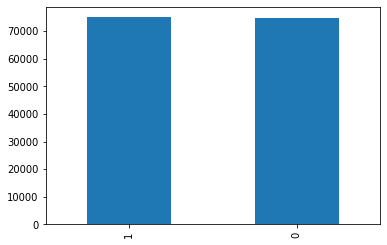

In [17]:
train_data['label'].value_counts().plot(kind = 'bar')

In [18]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  74918
1      1  75013


## 데이터 정제하기

정규 표현식을 사용하여 한글을 제외하고 모두 제거. 또한 혹시 이 과정에서 빈 샘플이 생기지는 않는지 확인

In [19]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


전처리 후 테스트용 샘플의 개수 : 49977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## 토큰화

형태소 분석기 Mecab을 사용하여 토큰화 작업을 수행

In [21]:
# 불용어 지정
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [22]:
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

## 단어와 길이 분포 확인하기

In [24]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [25]:
# 부정리뷰에 대해서 빈도가 높은 상위 20개 단어 출력.
# Counter()를 사용하여 각 단어에 대한 빈도수 계산

negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('네요', 31799), ('는데', 20295), ('안', 19718), ('어요', 14849), ('있', 13200), ('너무', 13058), ('했', 11783), ('좋', 9812), ('배송', 9677), ('같', 8997), ('구매', 8876), ('어', 8869), ('거', 8854), ('없', 8670), ('아요', 8642), ('습니다', 8436), ('그냥', 8355), ('되', 8345), ('잘', 8029), ('않', 7984)]


In [26]:
# 긍정리뷰에 대해서 빈도가 높은 상위 20개 단어 출력.
# Counter()를 사용하여 각 단어에 대한 빈도수 계산

positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('좋', 39488), ('아요', 21184), ('네요', 19895), ('어요', 18686), ('잘', 18602), ('구매', 16171), ('습니다', 13320), ('있', 12391), ('배송', 12275), ('는데', 11670), ('했', 9818), ('합니다', 9801), ('먹', 9635), ('재', 9273), ('너무', 8397), ('같', 7868), ('만족', 7261), ('거', 6482), ('어', 6294), ('쓰', 6292)]


긍정 리뷰의 평균 길이 : 13.587751456414221
부정 리뷰의 평균 길이 : 17.029525614672043


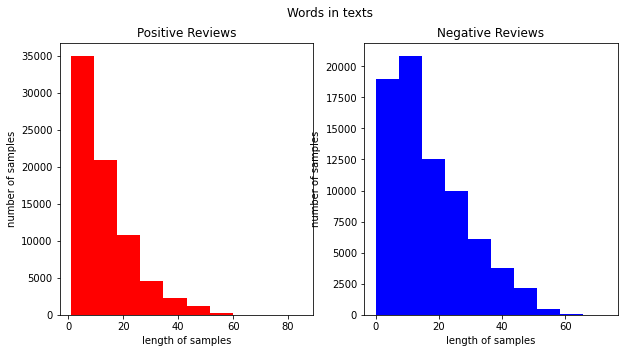

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [28]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [29]:
X_train[0]

['사이즈',
 '센치',
 '씩',
 '늘린',
 '건데',
 '작',
 '아요',
 '그리고',
 '색상',
 '완전',
 '달라요',
 '칙칙',
 '핑크',
 '네요',
 'ㅠㅠ',
 '많이',
 '아쉽',
 '지만',
 '암막',
 '효과',
 '좋',
 '아요']

In [30]:
y_train[0]

0

In [31]:
X_test[0]

['너무', '낮', '솜', '적', '실망', '스럽', '습니다']

In [32]:
y_test[0]

0

## 정수 인코딩

이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행해야 합니다. 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들어봅시다.

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었습니다. 이는 tokenizer.word_index를 출력하여 확인 가능합니다. 등장 횟수가 1회인 단어들은 자연어 처리에서 배제하고자 합니다. 이 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해봅시다.

In [34]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 39997
등장 빈도가 1번 이하인 희귀 단어의 수: 18212
단어 집합에서 희귀 단어의 비율: 45.53341500612546
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.79352492030765


In [35]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21787


이제 단어 집합의 크기는 21,787개입니다. 이를 토크나이저의 인자로 넘겨주면, 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환합니다. 이러한 정수 인코딩 과정에서 이보다 큰 숫자가 부여된 단어들은 OOV로 변환하겠습니

In [36]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [37]:
print(X_train[:3])

[[67, 2060, 299, 14260, 263, 73, 6, 236, 168, 137, 805, 2951, 625, 2, 77, 62, 207, 40, 1343, 155, 3, 6], [482, 409, 52, 8530, 2561, 2517, 339, 2918, 250, 2357, 38, 473, 2], [46, 24, 825, 105, 35, 2372, 160, 7, 10, 8061, 4, 1319, 29, 140, 322, 41, 59, 160, 140, 7, 1916, 2, 113, 162, 1379, 323, 119, 136]]


In [38]:
print(X_test[:3])

[[14, 704, 767, 116, 186, 252, 12], [339, 3904, 62, 3816, 1651], [11, 69, 2, 49, 164, 3, 27, 15, 6, 513, 289, 17, 92, 110, 564, 59, 7, 2]]


## 패딩

이제 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업을 진행해보겠습니다. 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포를 알아보겠습니다.

리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 15.30754813881052


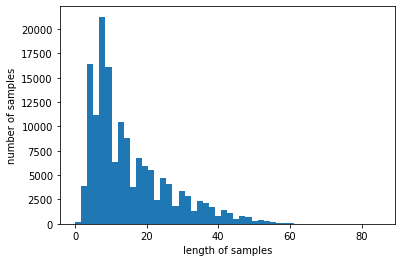

In [39]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [40]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [41]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99933302652553


In [42]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [45]:
print(X_train.shape)
print(X_test.shape)

(149931, 80)
(49977, 80)


## GRU로 네이버 쇼핑 리뷰 감성 분류하기

In [46]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [47]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [48]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - 315s 156ms/step - loss: 0.2708 - acc: 0.8970 - val_loss: 0.2304 - val_acc: 0.9172

Epoch 00001: val_acc improved from -inf to 0.91716, saving model to best_model.h5
Epoch 2/15
2000/2000 [==============================] - 310s 155ms/step - loss: 0.1969 - acc: 0.9297 - val_loss: 0.2200 - val_acc: 0.9181

Epoch 00002: val_acc improved from 0.91716 to 0.91806, saving model to best_model.h5
Epoch 3/15
2000/2000 [==============================] - 310s 155ms/step - loss: 0.1622 - acc: 0.9433 - val_loss: 0.2291 - val_acc: 0.9179

Epoch 00003: val_acc did not improve from 0.91806
Epoch 4/15
2000/2000 [==============================] - 308s 154ms/step - loss: 0.1343 - acc: 0.9528 - val_loss: 0.2522 - val_acc: 0.9133

Epoch 00004: val_acc did not improve from 0.91806
Epoch 5/15
2000/2000 [==============================] - 309s 155ms/step - loss: 0.1106 - acc: 0.9611 - val_loss: 0.2729 - val_acc: 0.9122

Epoch 00005: val_acc did not improve f

In [53]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도 : %.4f'% (loaded_model.evaluate(X_test, y_test)[1]))

1562/1562 [==============================] - 34s 21ms/step - loss: 0.2245 - acc: 0.9178

 테스트 정확도 : 0.9178


## 리뷰 예측

In [54]:
def sentiment_predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [55]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

98.07% 확률로 긍정 리뷰입니다.


In [56]:
sentiment_predict('진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?')

97.72% 확률로 부정 리뷰입니다.


# 글자 단위(Character-level)로 구현한 seq2seq 번역기

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np


In [29]:
import os
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/자연어처리/fra.txt'
lines = pd.read_csv(file_path, names=['eng', 'fra', 'cc'], sep='\t')
lines.sample(5)

,eng,fra,cc
87591,Tom wanted to talk to Mary.,Tom voulait parler à Maria.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2113,Is it nice?,Est-ce chouette ?,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
33939,He may have said so.,Il a peut-être dit ça.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
127199,Tom is writing on the blackboard.,Tom écrit sur le tableau.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
158589,I plan to reply to his letter right away.,Je prévois de répondre immédiatement à sa lettre.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...


In [30]:
lines = lines[['eng','fra']][:50000] # 5만개 샘플 사용
lines.sample(5)

,eng,fra
32481,You can trust them.,Tu peux leur faire confiance.
3537,Make a wish.,Fais un souhait !
32745,You're being silly.,Tu es idiot.
45622,You're very flexible.,Vous êtes très flexibles.
29749,It feels like rain.,On dirait qu'il va pleuvoir.


In [31]:
# 시작토큰과 종료 토큰 추가
sos_token = '\t'
eos_token = '\n'
lines.fra = lines.fra.apply(lambda x: '\t' + x + '\n')
print('전체 샘플의 수 :',len(lines))
lines.sample(5)

전체 샘플의 수 : 50000


,eng,fra
35683,Is that a bad thing?,\tEst-ce une mauvaise chose ?\n
3501,Keep trying.,\tContinuez d'essayer.\n
44415,We all knew about it.,\tNous le savions toutes.\n
17880,I didn't take it.,\tJe n'ai pas pris ça.\n
9350,Can you see it?,\tPeux-tu le voir ?\n


In [32]:
eng_tokenizer = Tokenizer(char_level=True)
# 글자 단위로 토큰화
eng_tokenizer.fit_on_texts(lines.eng)
# 50000개의 행을 가진 eng의 각 행에 토큰화 수행
input_text = eng_tokenizer.texts_to_sequences(lines.eng)
# 단어를 숫자값 인덱스로 변환하여 저장
input_text[:3]

[[19, 3, 8], [19, 3, 8], [19, 3, 8]]

In [33]:
fra_tokenizer = Tokenizer(char_level=True)
# 글자 단위로 토큰화
fra_tokenizer.fit_on_texts(lines.fra)
# 50000개의 행을 가진 eng의 각 행에 토큰화 수행
target_text = fra_tokenizer.texts_to_sequences(lines.fra)
# 단어를 숫자값 인덱스로 변환하여 저장
target_text[:3]

[[10, 19, 5, 1, 31, 11],
 [10, 15, 5, 12, 16, 29, 2, 14, 11],
 [10, 26, 9, 8, 28, 2, 1, 31, 11]]

In [34]:
eng_vocab_size = len(eng_tokenizer.word_index) + 1
fra_vocab_size = len(fra_tokenizer.word_index) + 1
print('영어 단어장의 크기 :',eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)

영어 단어장의 크기 : 52
프랑스어 단어장의 크기 : 73


In [35]:
max_eng_seq_len = max([len(line) for line in input_text])
max_fra_seq_len = max([len(line) for line in target_text])

print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스 시퀀스의 최대 길이', max_fra_seq_len)

영어 시퀀스의 최대 길이 22
프랑스 시퀀스의 최대 길이 74


In [36]:
print('전체 샘플의 수 :', len(lines))
print('영어 단어장의 크기:', eng_vocab_size)
print('프랑스어 단어장의 크기:', fra_vocab_size)
print('영어 시퀀스의 최대 길이:', max_eng_seq_len)
print('프랑스 시퀀스의 최대 길이', max_fra_seq_len)

전체 샘플의 수 : 50000
영어 단어장의 크기: 52
프랑스어 단어장의 크기: 73
영어 시퀀스의 최대 길이: 22
프랑스 시퀀스의 최대 길이 74


In [37]:
encoder_input = input_text

# 종료 토큰 제거
decoder_input = [[char for char in line if char != fra_tokenizer.word_index[eos_token]] for line in target_text]
# 시작 토큰 제거
decoder_target = [[char for char in line if char != fra_tokenizer.word_index[sos_token]] for line in target_text]


In [38]:
print(decoder_input[:3]) # <eos>토큰 제거
print(decoder_target[:3]) # <sos>토큰 제거

[[10, 19, 5, 1, 31], [10, 15, 5, 12, 16, 29, 2, 14], [10, 26, 9, 8, 28, 2, 1, 31]]
[[19, 5, 1, 31, 11], [15, 5, 12, 16, 29, 2, 14, 11], [26, 9, 8, 28, 2, 1, 31, 11]]


In [39]:
encoder_input = pad_sequences(encoder_input, maxlen=max_eng_seq_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_fra_seq_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen=max_fra_seq_len, padding='post')

print('영어 데이터의 크기(shape) :', np.shape(encoder_input))
print('프랑스어 입력데이터의 크기 : ', np.shape(decoder_input))
print('프랑스어 출력데이터의 크기 : ', np.shape(decoder_target))

영어 데이터의 크기(shape) : (50000, 22)
프랑스어 입력데이터의 크기 :  (50000, 74)
프랑스어 출력데이터의 크기 :  (50000, 74)


In [40]:
print(encoder_input[0])

[19  3  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [41]:
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

print('영어 데이터의 크기 :', np.shape(encoder_input))
print('프랑스어 입력데이터의 크기 : ', np.shape(decoder_input))
print('프랑스어 출력데이터의 크기 :', np.shape(decoder_target)) #샘플의 수 x 샘플의 길이 x 단어장의 크기

영어 데이터의 크기 : (50000, 22, 52)
프랑스어 입력데이터의 크기 :  (50000, 74, 73)
프랑스어 출력데이터의 크기 : (50000, 74, 73)


In [42]:
n_of_val = 3000

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('영어 학습데이터의 크기 :', np.shape(encoder_input))
print('프랑스어 학습 입력데이터의 크기 :', np.shape(decoder_input))
print('프랑스어 학습 출력데이터의 크기 :',np.shape(decoder_target))

영어 학습데이터의 크기 : (50000, 22, 52)
프랑스어 학습 입력데이터의 크기 : (50000, 74, 73)
프랑스어 학습 출력데이터의 크기 : (50000, 74, 73)


## 모델 훈련하기

In [43]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model

In [44]:
# LSTM셀의 마지막 time step의 hidden state와 cell state를 디코더 LSTM의 첫번째 hidden state와 cell state전달해주자

encoder_inputs = Input(shape=(None, eng_vocab_size))
# 입력 텐서를 생성
encoder_lstm = LSTM(units= 256, return_state=True)
# hidden state 256인 LSTM을 생성
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
# 디코더로 전달할 hidden state, cell state를 리턴. encoder_output은 여기서는 불필요.
encoder_states = [state_h, state_c]
# hidden state와 cell state를 다음 time step으로 전달하기 위해서 별도로 저장

In [45]:
decoder_inputs = Input(shape=(None, fra_vocab_size))
# 입력 텐서 생성
decoder_lstm = LSTM(units=256, return_sequences= True, return_state=True)
# hidden state size 256 디코더 LSTM 생성
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state = encoder_states)
# decoder output는 모든 timestep의 hidden state

In [46]:
decoder_softmax_layer = Dense(fra_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

In [47]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, 52)]   0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None, 73)]   0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 256), (None, 316416      input_5[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, None, 256),  337920      input_6[0][0]                    
                                                                 lstm_2[0][1]               

In [21]:
model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), batch_size=128, epochs=30)

Epoch 1/30
368/368 [==============================] - 267s 716ms/step - loss: 0.9028 - val_loss: 0.7896
Epoch 2/30
368/368 [==============================] - 264s 717ms/step - loss: 0.5576 - val_loss: 0.6501
Epoch 3/30
368/368 [==============================] - 263s 715ms/step - loss: 0.4607 - val_loss: 0.5595
Epoch 4/30
368/368 [==============================] - 265s 720ms/step - loss: 0.4056 - val_loss: 0.5205
Epoch 5/30
368/368 [==============================] - 265s 719ms/step - loss: 0.3692 - val_loss: 0.4743
Epoch 6/30
368/368 [==============================] - 266s 724ms/step - loss: 0.3425 - val_loss: 0.4500
Epoch 7/30
368/368 [==============================] - 264s 717ms/step - loss: 0.3217 - val_loss: 0.4272
Epoch 8/30
368/368 [==============================] - 264s 717ms/step - loss: 0.3050 - val_loss: 0.4137
Epoch 9/30
368/368 [==============================] - 263s 714ms/step - loss: 0.2914 - val_loss: 0.3968
Epoch 10/30
368/368 [==============================] - 263s 714m

## 모델 테스트

테스트 단계에서 디코더 동작 순서
- 인코더에 입력 문장을 넣어 마지막 time step의 hidden, cell state를 얻는다.
- 토큰인 \t를 디코더에 입력한다.
- 이전 timestep의 출력층의 예측결과를 현재 timestep의 입력으로 한다.
- 3을 반복하다가 토큰인 \n가 예측되면 이를 중단한다.

In [22]:
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 52)]        0         
_________________________________________________________________
lstm (LSTM)                  [(None, 256), (None, 256) 316416    
Total params: 316,416
Trainable params: 316,416
Non-trainable params: 0
_________________________________________________________________


In [23]:
decoder_state_input_h = Input(shape=(256,))
# 이전 timestep의 hidden state를 저장하는 텐서
decoder_state_input_c = Input(shape=(256,))
# 이전 timestep의 cell state를 저장하는 텐서
decoder_state_inputs = [decoder_state_input_h, decoder_state_input_c]
# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장

# decoder_state_inputs를 현재 time step의 초기상태로 사용
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_state_inputs)
# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states = [state_h, state_c]

In [24]:
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model= Model(inputs=[decoder_inputs] + decoder_state_inputs, outputs=[decoder_outputs]+decoder_states)
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 73)]   0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 256),  337920      input_2[0][0]                    
                                                                 input_3[0][0]              

In [25]:
eng2idx = eng_tokenizer.word_index
fra2idx = fra_tokenizer.word_index
idx2eng = eng_tokenizer.index_word
idx2fra = fra_tokenizer.index_word

In [26]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 상태를 얻음
  states_value = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 원-핫 벡터 생성
  target_seq = np.zeros((1, 1, fra_vocab_size))
  target_seq[0, 0, fra2idx['\t']] =1

  stop_condition = False
  decoded_sentence = ""

  # stop condition이 True가 될떄까지 루프 반복
  while not stop_condition:
    # 이전 시점의 상태 state_value를 현 시점의 초기 상태로 사용
    output_tokens, h, c = decoder_model.predict([target_seq]+ states_value)

    # 예측 결과를 문자로 변환
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_char = idx2fra[sampled_token_index]

    # 현재 시점의 예측 문자를 예측 문장에 추가
    decoded_sentence += sampled_char

    # <eos>에 도달하거나 최대 길이를 넘으면 중단
    if (sampled_char == '\n' or
        len(decoded_sentence) > max_fra_seq_len):
      stop_condition = True

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
    target_seq = np.zeros((1, 1, fra_vocab_size))
    target_seq[0, 0, sampled_token_index] =1

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h, c]
  return decoded_sentence

In [27]:
import numpy as np
for seq_index in [3, 50, 100, 300, 1001]:
  # 입력 문장의 인덱스 (자유롭게 바꿔서 테스트 해보세요!)
  input_seq = encoder_input[seq_index: seq_index +1]
  decoded_sentence = decode_sequence(input_seq)
  print(35 * "-")
  print('입력 문장 :', lines.eng[seq_index])
  print('정답 문장 :', lines.fra[seq_index][1:len(lines.fra[seq_index])-1])
  # '\t'와 '\n'을 빼고 출력
  print('번역기가 번역한 문장 :', decoded_sentence[:len(decoded_sentence)-1])
  # '\n'을 빼고 출력

-----------------------------------
입력 문장 : Hi.
정답 문장 : Salut !
번역기가 번역한 문장 : salut !
-----------------------------------
입력 문장 : I won!
정답 문장 : Je l'ai emporté !
번역기가 번역한 문장 : j'ai tent !
-----------------------------------
입력 문장 : I fled.
정답 문장 : J'ai fui.
번역기가 번역한 문장 : je suis tombé.
-----------------------------------
입력 문장 : Hug Tom.
정답 문장 : Fais un câlin à Tom.
번역기가 번역한 문장 : selez tom.
-----------------------------------
입력 문장 : I give in.
정답 문장 : Je donne ma langue au chat.
번역기가 번역한 문장 : je l'ai vu.
